In [49]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np 
import time
import mlrose_hiive
import matplotlib.pyplot as plt
import math
from random import randint
import warnings
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier



warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 4 Peaks


1.3269939422607422 5
28.70121741294861 25
124.99154615402222 45
307.35440278053284 65
461.62176156044006 85


Text(0.5, 1.0, 'Computation Time vs. Input Size (4 Peaks)')

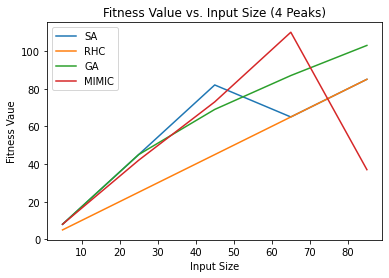

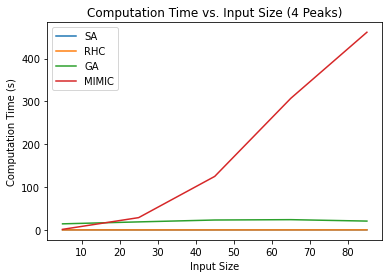

In [7]:
fitness_sa_arr = []
fitness_rhc_arr = []
fitness_ga_arr = []
fitness_mimic_arr = []

time_sa_arr = []
time_rhc_arr = []
time_ga_arr = []
time_mimic_arr = []
for n in range(5,100,20):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    st = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, 
                                                                                  max_attempts = 1000, max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    sa_time = end-st

    st = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, 
                                                                                   max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    rhc_time = end-st

    st = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000,
                                                                          max_iters=10000, curve=True)
    end = time.time()
    ga_time = end-st

    st = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500, max_attempts = 100,
                                                                             max_iters=10000, curve=True)
    end = time.time()
    mimic_time = end-st
    print(mimic_time,n)

    fitness_sa_arr.append(best_fitness_sa)
    fitness_rhc_arr.append(best_fitness_rhc)
    fitness_ga_arr.append(best_fitness_ga)
    fitness_mimic_arr.append(best_fitness_mimic)

    time_sa_arr.append(sa_time)
    time_rhc_arr.append(rhc_time)
    time_ga_arr.append(ga_time)
    time_mimic_arr.append(mimic_time)

fitness_sa_arr = np.array(fitness_sa_arr)
fitness_rhc_arr = np.array(fitness_rhc_arr)
fitness_ga_arr = np.array(fitness_ga_arr)
fitness_mimic_arr = np.array(fitness_mimic_arr)

time_sa_arr = np.array(time_sa_arr)
time_rhc_arr = np.array(time_rhc_arr)
time_ga_arr = np.array(time_ga_arr)
time_mimic_arr = np.array(time_mimic_arr)

plt.figure(1)
plt.plot(np.arange(5,100,20),fitness_sa_arr,label='SA')
plt.plot(np.arange(5,100,20),fitness_rhc_arr,label = 'RHC')
plt.plot(np.arange(5,100,20),fitness_ga_arr, label = 'GA')
plt.plot(np.arange(5,100,20),fitness_mimic_arr, label = 'MIMIC')
plt.xlabel('Input Size')
plt.ylabel('Fitness Vaue')
plt.legend()
plt.title('Fitness Value vs. Input Size (4 Peaks)')
plt.savefig('img/4_peaks_input_size_fitness.png')

plt.figure(1)
plt.plot(np.arange(5,100,20),time_sa_arr,label='SA')
plt.plot(np.arange(5,100,20),time_rhc_arr,label='RHC')
plt.plot(np.arange(5,100,20),time_ga_arr,label='GA')
plt.plot(np.arange(5,100,20),time_mimic_arr,label='MIMIC')
plt.legend()
plt.xlabel('Input Size')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs. Input Size (4 Peaks)')
plt.savefig('img/4_peaks_input_size_computation.png')


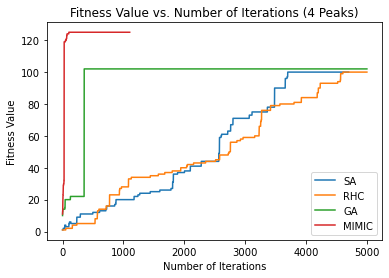

In [23]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 85, fitness_fn = fitness, maximize=True, max_val=2)
init_state = np.random.randint(2,size = 85)
schedule = mlrose.ExpDecay()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, max_iters=5000, init_state = init_state, curve=True)
best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters=5000, init_state = init_state, curve=True)
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000, max_iters=5000, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500,max_attempts = 1000, max_iters=5000, curve=True)

plt.figure(2)
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_ga,label='GA')
plt.plot(fitness_curve_mimic,label='MIMIC')
plt.legend()
plt.ylabel('Fitness Value')
plt.xlabel('Number of Iterations')
plt.title('Fitness Value vs. Number of Iterations (4 Peaks)')
plt.savefig('img/4_peaks_iterations.png')
    

# Knapsack


1.5619831085205078 5
4.76200795173645 10
8.950984001159668 15
16.78798270225525 20
26.504989862442017 25
48.46001577377319 35
62.92799973487854 40


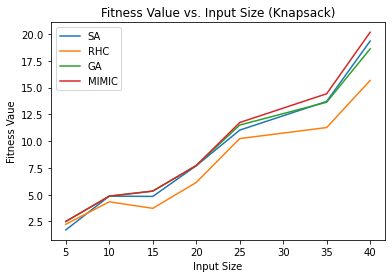

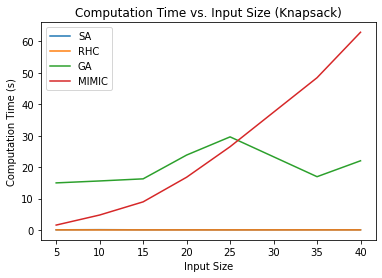

In [27]:
results = {}    

np.random.seed(0)

maxWeight = 0.65

n_items = [5, 10, 15, 20, 25, 35, 40]
# Initialize backpack parameters here so all algo's use the same problems
weights = {}
values = {}
for n_item in n_items:
    weights[n_item] = np.random.rand(n_item)
    values[n_item] = np.random.rand(n_item)


fitness_sa_arr = []
fitness_rhc_arr = []
fitness_ga_arr = []
fitness_mimic_arr = []

time_sa_arr = []
time_rhc_arr = []
time_ga_arr = []
time_mimic_arr = []
for n in n_items:
    fitness =  mlrose.Knapsack(weights[n], values[n], maxWeight) 
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    st = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, 
                                                                                  max_attempts = 1000, max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    sa_time = end-st

    st = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, 
                                                                                   max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    rhc_time = end-st

    st = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000,
                                                                          max_iters=10000, curve=True)
    end = time.time()
    ga_time = end-st

    st = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500, max_attempts = 100,
                                                                             max_iters=10000, curve=True)
    end = time.time()
    mimic_time = end-st
    print(mimic_time,n)

    fitness_sa_arr.append(best_fitness_sa)
    fitness_rhc_arr.append(best_fitness_rhc)
    fitness_ga_arr.append(best_fitness_ga)
    fitness_mimic_arr.append(best_fitness_mimic)

    time_sa_arr.append(sa_time)
    time_rhc_arr.append(rhc_time)
    time_ga_arr.append(ga_time)
    time_mimic_arr.append(mimic_time)

fitness_sa_arr = np.array(fitness_sa_arr)
fitness_rhc_arr = np.array(fitness_rhc_arr)
fitness_ga_arr = np.array(fitness_ga_arr)
fitness_mimic_arr = np.array(fitness_mimic_arr)

time_sa_arr = np.array(time_sa_arr)
time_rhc_arr = np.array(time_rhc_arr)
time_ga_arr = np.array(time_ga_arr)
time_mimic_arr = np.array(time_mimic_arr)


plt.figure(10)
plt.plot(n_items,fitness_sa_arr,label='SA')
plt.plot(n_items,fitness_rhc_arr,label = 'RHC')
plt.plot(n_items,fitness_ga_arr, label = 'GA')
plt.plot(n_items,fitness_mimic_arr, label = 'MIMIC')
plt.xlabel('Input Size')
plt.ylabel('Fitness Vaue')
plt.legend()
plt.title('Fitness Value vs. Input Size (Knapsack)')
plt.savefig('img/knap_input_size_fitness.png')

plt.figure()
plt.plot(n_items,time_sa_arr,label='SA')
plt.plot(n_items,time_rhc_arr,label='RHC')
plt.plot(n_items,time_ga_arr,label='GA')
plt.plot(n_items,time_mimic_arr,label='MIMIC')
plt.legend()
plt.xlabel('Input Size')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs. Input Size (Knapsack)')
plt.savefig('img/knap_input_size_computation.png')

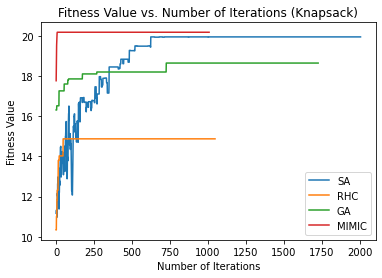

In [31]:
fitness =  mlrose.Knapsack(weights[40], values[40], maxWeight) 

problem = mlrose.DiscreteOpt(length = 40, fitness_fn = fitness, maximize=True, max_val=2)
init_state = np.random.randint(2,size = 40)
schedule = mlrose.ExpDecay()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, max_iters=5000, init_state = init_state, curve=True)
best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters=5000, init_state = init_state, curve=True)
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000, max_iters=5000, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500,max_attempts = 1000, max_iters=5000, curve=True)

plt.figure(1)
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_ga,label='GA')
plt.plot(fitness_curve_mimic,label='MIMIC')
plt.legend()
plt.ylabel('Fitness Value')
plt.xlabel('Number of Iterations')
plt.title('Fitness Value vs. Number of Iterations (Knapsack)')
plt.savefig('img/knap_iterations.png')
    

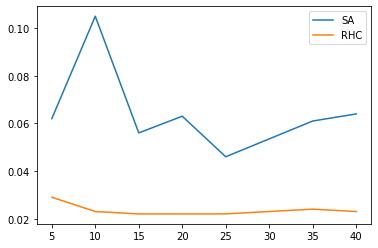

In [30]:
plt.plot(n_items,time_sa_arr,label='SA')
plt.plot(n_items,time_rhc_arr,label='RHC')
plt.legend()

# One Max


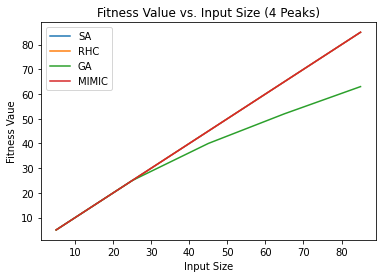

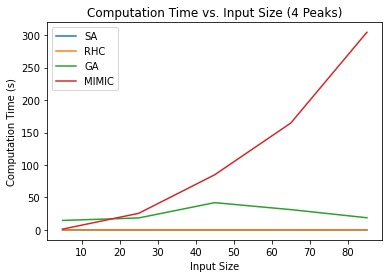

In [33]:
fitness_sa_arr = []
fitness_rhc_arr = []
fitness_ga_arr = []
fitness_mimic_arr = []

time_sa_arr = []
time_rhc_arr = []
time_ga_arr = []
time_mimic_arr = []
for n in range(5,100,20):
    fitness = mlrose.OneMax()
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    st = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, 
                                                                                  max_attempts = 1000, max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    sa_time = end-st

    st = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, 
                                                                                   max_iters=10000, init_state = init_state, curve=True)
    end = time.time()
    rhc_time = end-st

    st = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000,
                                                                          max_iters=10000, curve=True)
    end = time.time()
    ga_time = end-st

    st = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500, max_attempts = 100,
                                                                             max_iters=10000, curve=True)
    end = time.time()
    mimic_time = end-st
    print(mimic_time,n)

    fitness_sa_arr.append(best_fitness_sa)
    fitness_rhc_arr.append(best_fitness_rhc)
    fitness_ga_arr.append(best_fitness_ga)
    fitness_mimic_arr.append(best_fitness_mimic)

    time_sa_arr.append(sa_time)
    time_rhc_arr.append(rhc_time)
    time_ga_arr.append(ga_time)
    time_mimic_arr.append(mimic_time)

fitness_sa_arr = np.array(fitness_sa_arr)
fitness_rhc_arr = np.array(fitness_rhc_arr)
fitness_ga_arr = np.array(fitness_ga_arr)
fitness_mimic_arr = np.array(fitness_mimic_arr)

time_sa_arr = np.array(time_sa_arr)
time_rhc_arr = np.array(time_rhc_arr)
time_ga_arr = np.array(time_ga_arr)
time_mimic_arr = np.array(time_mimic_arr)

plt.figure(21)
plt.plot(np.arange(5,100,20),fitness_sa_arr,label='SA')
plt.plot(np.arange(5,100,20),fitness_rhc_arr,label = 'RHC')
plt.plot(np.arange(5,100,20),fitness_ga_arr, label = 'GA')
plt.plot(np.arange(5,100,20),fitness_mimic_arr, label = 'MIMIC')
plt.xlabel('Input Size')
plt.ylabel('Fitness Vaue')
plt.legend()
plt.title('Fitness Value vs. Input Size (4 Peaks)')
plt.savefig('img/1max_input_size_fitness.png')

plt.figure(22)
plt.plot(np.arange(5,100,20),time_sa_arr,label='SA')
plt.plot(np.arange(5,100,20),time_rhc_arr,label='RHC')
plt.plot(np.arange(5,100,20),time_ga_arr,label='GA')
plt.plot(np.arange(5,100,20),time_mimic_arr,label='MIMIC')
plt.legend()
plt.xlabel('Input Size')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs. Input Size (4 Peaks)')
plt.savefig('img/1max_input_size_computation.png')


In [36]:
fitness_sa_arr

array([ 5., 25., 45., 65., 85.])

In [37]:
time_sa_arr

array([0.03998208, 0.03397989, 0.03701663, 0.04699993, 0.04098344])

In [38]:
time_rhc_arr

array([0.02100062, 0.01801586, 0.01998353, 0.02600074, 0.02201509])

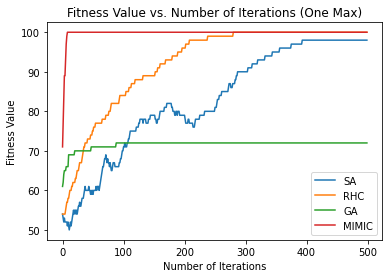

In [41]:
fitness =  mlrose.OneMax() 

problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
init_state = np.random.randint(2,size = 100)
schedule = mlrose.ExpDecay()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, max_iters=500, init_state = init_state, curve=True)
best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters=500, init_state = init_state, curve=True)
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000, max_iters=500, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=500,max_attempts = 1000, max_iters=500, curve=True)

plt.figure(1)
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_ga,label='GA')
plt.plot(fitness_curve_mimic,label='MIMIC')
plt.legend()
plt.ylabel('Fitness Value')
plt.xlabel('Number of Iterations')
plt.title('Fitness Value vs. Number of Iterations (One Max)')
plt.savefig('img/1max_iterations.png')
    

In [42]:
def splitData(dataX, dataY, percentage):
    dataXTrain, dataXTest, dataYTrain, dataYTest = train_test_split(
        dataX,dataY, test_size=percentage, random_state=0)
    return dataXTrain, dataXTest, dataYTrain, dataYTest

In [46]:
wine = pd.read_csv("data/wine/winequality-white.csv" , sep=';')

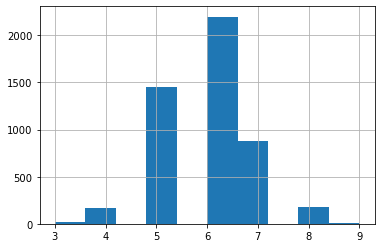

In [47]:
conditions = [
    (wine['quality'] <= 6),
    (wine['quality'] > 6) 
    ]
values = [0, 1]
wine['good_quality'] = np.select(conditions, values)
wine['quality'].hist()

wineY = wine['good_quality']
wineX = wine.drop(columns=['good_quality','quality'])

In [50]:
scaler = MinMaxScaler()

wineXScaled = scaler.fit_transform(wineX)

In [51]:
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    wineXScaled,wineY, 0.25)

In [64]:
rhc = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)
rhc.fit(wineXTrain, wineYTrain)
y_train_pred = nn_model1.predict(wineXTrain)

y_train_accuracy = accuracy_score(wineYTrain, y_train_pred)
y_test_pred = rhc.predict(wineXTest)

y_test_accuracy = accuracy_score(wineYTest, y_test_pred)


print("RHC train accuracy: ", y_train_accuracy)
print("RHC test accuracy: ", y_test_accuracy)


RHC train accuracy:  0.7821943915055812
RHC test accuracy:  0.7853061224489796


In [66]:
sa = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)
sa.fit(wineXTrain, wineYTrain)
y_train_pred = sa.predict(wineXTrain)

y_train_accuracy = accuracy_score(wineYTrain, y_train_pred)
y_test_pred = sa.predict(wineXTest)

y_test_accuracy = accuracy_score(wineYTest, y_test_pred)


print("SA train accuracy: ", y_train_accuracy)
print("SA test accuracy: ", y_test_accuracy)


SA train accuracy:  0.7821943915055812
SA test accuracy:  0.7844897959183673


In [54]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, curve = True)
nn_model1.fit(wineXTrain, wineYTrain)
y_train_pred = nn_model1.predict(wineXTrain)

y_train_accuracy = accuracy_score(wineYTrain, y_train_pred)
y_test_pred = nn_model1.predict(wineXTest)

y_test_accuracy = accuracy_score(wineYTest, y_test_pred)


print("SA train accuracy: ", y_train_accuracy)
print("SA test accuracy: ", y_test_accuracy)


0.7824666485161993


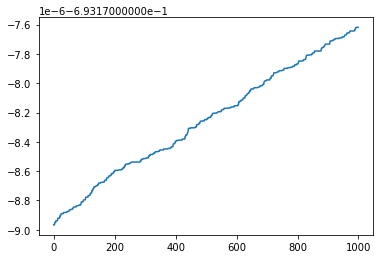

In [70]:
plt.plot(rhc.fitness_curve)